In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import torch 
from torch import nn
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
rootdir = './data'

xrd = pd.read_pickle(os.path.join(rootdir,'xrd.txt'))
params = pd.read_pickle(os.path.join(rootdir,'params.txt'))
energy = pd.read_pickle(os.path.join(rootdir,'energy.txt'))

print(xrd.shape)


In [3]:
nrf = np.empty((41108, 6))

for i, p in enumerate(params):
    nrf[i][0] = 1
    nrf[i][1] = (p[1]/p[0])**2
    nrf[i][2] = (p[2]/p[0])**2
    nrf[i][3] = (p[1]/p[0])*(p[2]/p[0])*np.cos(np.radians(p[3]))
    nrf[i][4] = 1*(p[2]/p[0])*np.cos(np.radians(p[4]))
    nrf[i][5] = 1*(p[1]/p[0])*np.cos(np.radians(p[5]))

energy max: 95.89070620500001 energy min: -0.035738539499999965


22

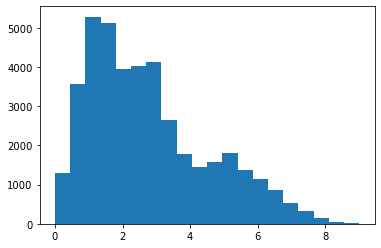

In [4]:
max = np.amax(energy)
min = np.amin(energy)
print('energy max:', max, 'energy min:', min)

plt.hist(energy, bins=20, range=[-0.001, 9])
sum(i > 9 for i in energy)